In [1]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from shapely.geometry import mapping
import rioxarray as rxr
import xarray as xr
import geopandas as gpd

import earthpy as et
import earthpy.plot as ep

In [2]:
sns.set(font_scale=1.5)

In [3]:
et.data.get_data("colorado-flood")
os.chdir(os.path.join(et.io.HOME,'earth-analytics','data'))

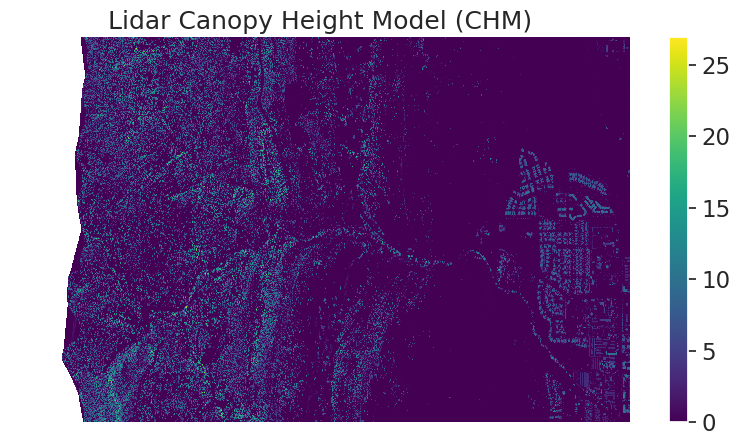

In [4]:
lidar_chm_path = os.path.join("colorado-flood", 
                              "spatial"
                              "boulder-leehill-rd",
                              "outputs",
                              "lidar_chm.tif")

lidar_chm_im = rxr.open_rasterio("colorado-flood/spatial/boulder-leehill-rd/outputs/lidar_chm.tif",masked=True).squeeze()

f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow()
ax.set(title="Lidar Canopy Height Model (CHM)")

ax.set_axis_off()
plt.show()

In [5]:
aoi = os.path.join("colorado-flood",
                   "spatial",
                   "boulder-leehill-rd",
                   "clip-extent.shp")

crop_extent = gpd.read_file(aoi)

In [6]:
print('crop extent crs: ', crop_extent.crs)

print('lidar crs: ', lidar_chm_im.rio.crs)

crop extent crs:  EPSG:32613
lidar crs:  EPSG:32613


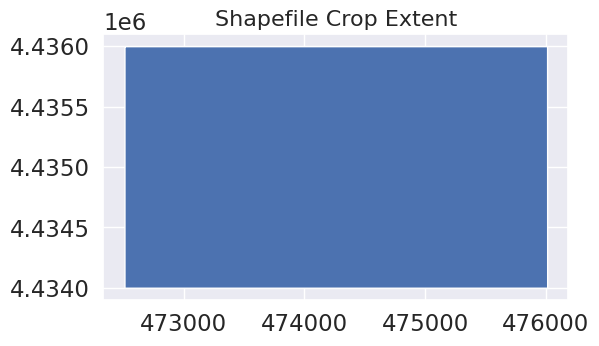

In [7]:
fig, ax = plt.subplots(figsize=(6, 6))

crop_extent.plot(ax=ax)

ax.set_title("Shapefile Crop Extent", fontsize=16)
plt.show()

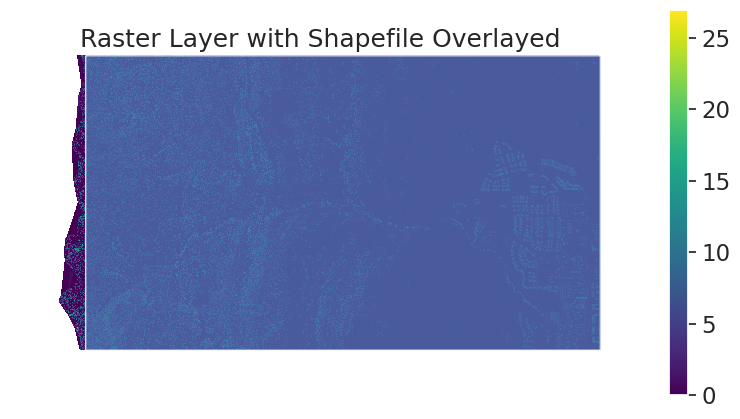

In [8]:
f, ax = plt.subplots(figsize=(10, 5))
lidar_chm_im.plot.imshow(ax=ax)

crop_extent.plot(ax=ax,
                 alpha=.8)
ax.set(title="Raster Layer with Shapefile Overlayed")

ax.set_axis_off()
plt.show()

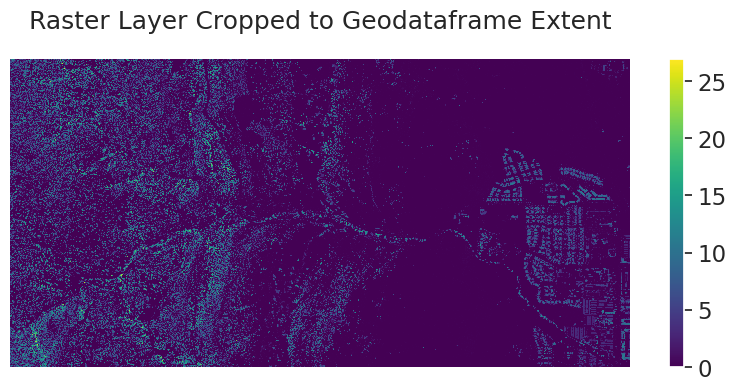

In [11]:
lidar_clipped = lidar_chm_im.rio.clip(crop_extent.geometry.apply(mapping),crop_extent.crs)

f, ax = plt.subplots(figsize=(10, 4))
lidar_clipped.plot(ax=ax)
ax.set(title="Raster Layer Cropped to Geodataframe Extent")
ax.set_axis_off()
plt.show()

In [12]:
path_to_tif_file = os.path.join("colorado-flood",
                                "spatial",
                                "outputs",
                                "lidar_chm_cropped.tif")

lidar_clipped.rio.to_raster(path_to_tif_file)

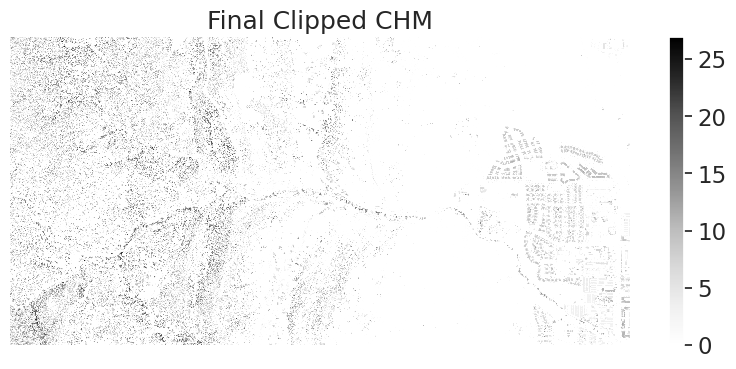

In [13]:
clipped_chm = rxr.open_rasterio(path_to_tif_file)

f, ax = plt.subplots(figsize=(10, 4))
clipped_chm.plot(ax=ax,
                 cmap='Greys')
ax.set(title="Final Clipped CHM")
ax.set_axis_off()
plt.show()